In [19]:
import pandas as pd
import re
import pickle
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import liwc
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import numpy as np
# Download NLTK data
# nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_csv('amazon.csv') 

In [154]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   product_id              1465 non-null   object
 1   product_name            1465 non-null   object
 2   category                1465 non-null   object
 3   discounted_price        1465 non-null   object
 4   actual_price            1465 non-null   object
 5   discount_percentage     1465 non-null   object
 6   rating                  1465 non-null   object
 7   rating_count            1463 non-null   object
 8   about_product           1465 non-null   object
 9   user_id                 1465 non-null   object
 10  user_name               1465 non-null   object
 11  review_id               1465 non-null   object
 12  review_title            1465 non-null   object
 13  review_content          1465 non-null   object
 14  img_link                1465 non-null   object
 15  prod

In [39]:
df.isna().sum()  

product_id                0
product_name              0
category                  0
discounted_price          0
actual_price              0
discount_percentage       0
rating                    0
rating_count              2
about_product             0
user_id                   0
user_name                 0
review_id                 0
review_title              0
review_content            0
img_link                  0
product_link              0
liwc_analysis             0
cleaned_review_content    0
sentiment                 0
review_type               0
dtype: int64

In [21]:
parse, category_names = liwc.load_token_parser('LIWC2007_English100131.dic') #call Dict file

In [22]:
def analyze_text(text):
    tokens = text.split()
    categories = [category for token in tokens for category in parse(token)]
    return Counter(categories)

In [23]:
df['liwc_analysis'] = df['review_content'].apply(analyze_text)

In [24]:
print(df['liwc_analysis'].head())

0    {'verb': 13, 'funct': 27, 'auxverb': 11, 'pres...
1    {'funct': 94, 'pronoun': 17, 'ipron': 12, 'pre...
2    {'cogmech': 5, 'tentat': 1, 'funct': 3, 'conj'...
3    {'cogmech': 12, 'cause': 4, 'work': 7, 'achiev...
4    {'funct': 184, 'pronoun': 36, 'ipron': 24, 'ad...
Name: liwc_analysis, dtype: object


In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


In [26]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [27]:
def classify_review(text):
    if 'good' in text or 'great' in text or 'excellent' in text:
        return 'Real'
    else:
        return 'Fake'

In [28]:

df['cleaned_review_content'] = df['review_content'].apply(clean_text)

df['sentiment'] = df['cleaned_review_content'].apply(get_sentiment)
df['review_type'] = df['cleaned_review_content'].apply(classify_review)


print(df[['product_id', 'review_content', 'cleaned_review_content', 'sentiment', 'review_type']])


      product_id                                     review_content  \
0     B07JW9H4J1  Looks durable Charging is fine tooNo complains...   
1     B098NS6PVG  I ordered this cable to connect my phone to An...   
2     B096MSW6CT  Not quite durable and sturdy,https://m.media-a...   
3     B08HDJ86NZ  Good product,long wire,Charges good,Nice,I bou...   
4     B08CF3B7N1  Bought this instead of original apple, does th...   
...          ...                                                ...   
1460  B08L7J3T31  I received product without spanner,Excellent p...   
1461  B01M6453MB  ok,got everything as mentioned but the measuri...   
1462  B009P2LIL4  plastic but cool body ,u have to find sturdy s...   
1463  B00J5DYCCA  I have installed this in my kitchen working fi...   
1464  B01486F4G6  It does it job perfectly..only issue is temp c...   

                                 cleaned_review_content sentiment review_type  
0     looks durable charging is fine toono complains...  Positive  

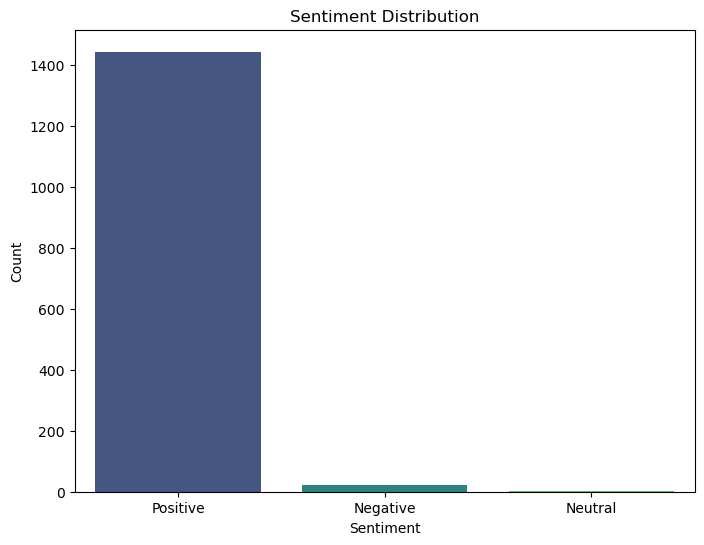

In [29]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sentiment', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


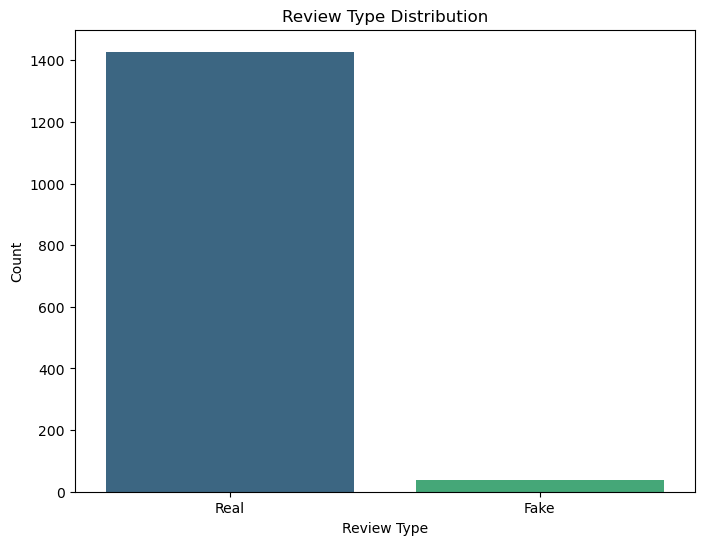

In [30]:

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='review_type', palette='viridis')
plt.title('Review Type Distribution')
plt.xlabel('Review Type')
plt.ylabel('Count')
plt.show()


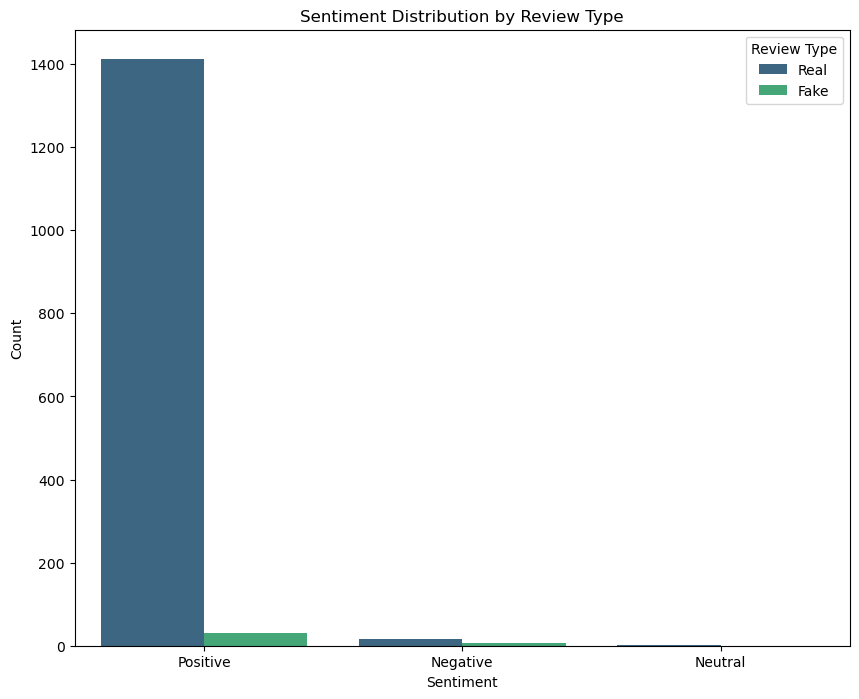

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='sentiment', hue='review_type', palette='viridis')
plt.title('Sentiment Distribution by Review Type')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Review Type')
plt.show()


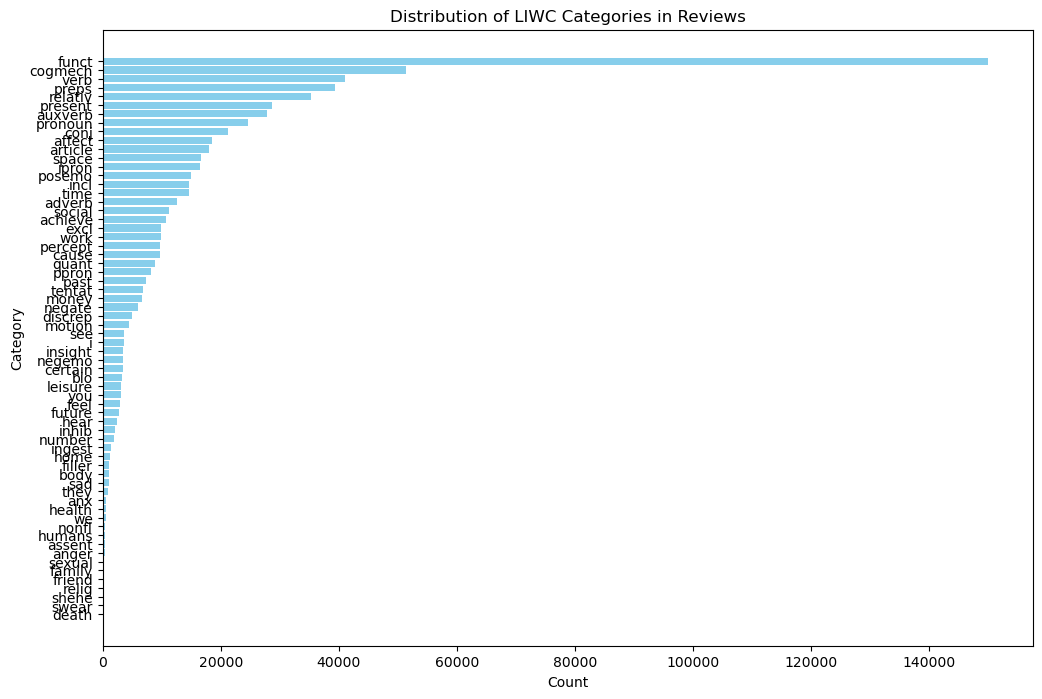

In [13]:
import matplotlib.pyplot as plt

category_counts = Counter()
for analysis in df['liwc_analysis']:
    category_counts.update(analysis)

liwc_df = pd.DataFrame(category_counts.items(), columns=['Category', 'Count'])

liwc_df = liwc_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(liwc_df['Category'], liwc_df['Count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution of LIWC Categories in Reviews')
plt.gca().invert_yaxis()  
plt.show()


In [42]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,liwc_analysis,cleaned_review_content,sentiment,review_type
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,"{'verb': 13, 'funct': 27, 'auxverb': 11, 'pres...",looks durable charging is fine toono complains...,Positive,Real
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,"{'funct': 94, 'pronoun': 17, 'ipron': 12, 'pre...",i ordered this cable to connect my phone to an...,Positive,Real
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,"{'cogmech': 5, 'tentat': 1, 'funct': 3, 'conj'...",not quite durable and sturdy good nice product...,Positive,Real
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,"{'cogmech': 12, 'cause': 4, 'work': 7, 'achiev...",good productlong wirecharges goodnicei bought ...,Positive,Real
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,"{'funct': 184, 'pronoun': 36, 'ipron': 24, 'ad...",bought this instead of original apple does the...,Positive,Real
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R

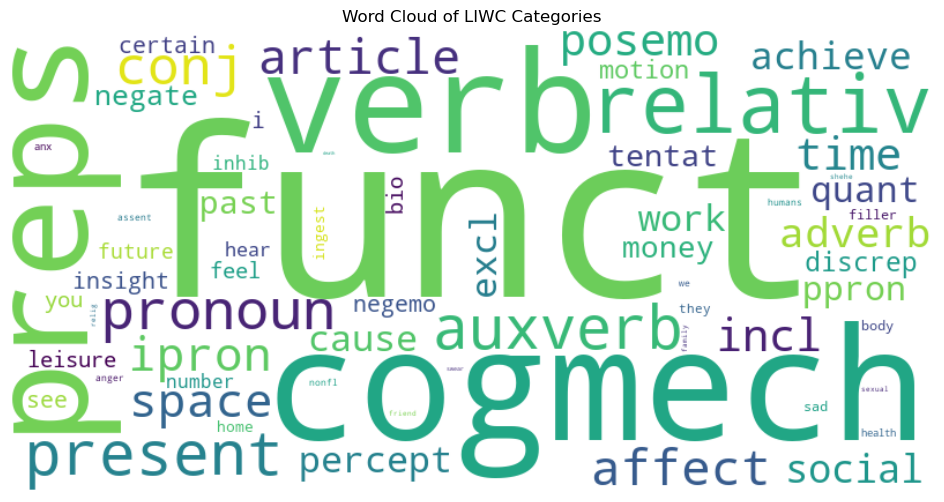

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(category_counts)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of LIWC Categories')
plt.show()


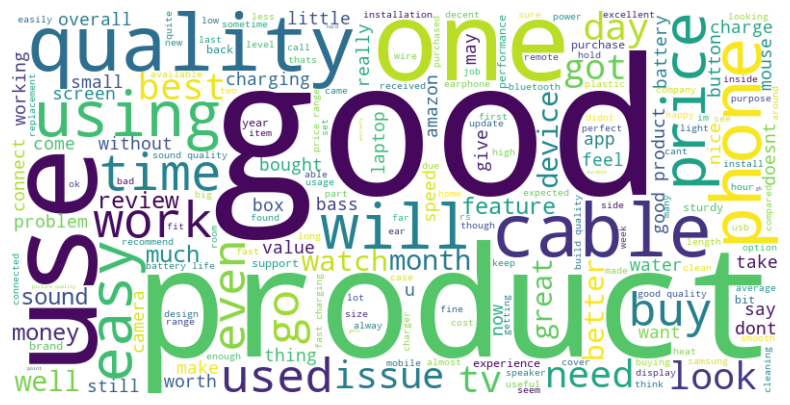

In [40]:
# Combine all the cleaned reviews into a single string
all_reviews = ' '.join(df['cleaned_review_content'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

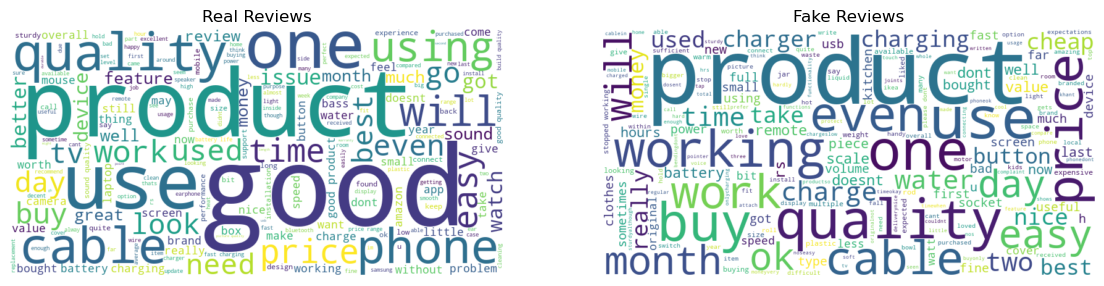

In [44]:

df_real = df[df['review_type'] == 'Real']
df_fake = df[df['review_type'] == 'Fake']

all_reviews_real = ' '.join(df_real['cleaned_review_content'])
all_reviews_fake = ' '.join(df_fake['cleaned_review_content'])

wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_real)
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_fake)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Real Reviews')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake Reviews')

plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X = df[['cleaned_review_content']] 
y = df['review_type'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
y_test

976     Real
175     Real
275     Real
548     Real
869     Real
        ... 
1456    Fake
481     Real
482     Real
1052    Real
649     Real
Name: review_type, Length: 293, dtype: object

In [140]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train['cleaned_review_content'])
X_test_vectorized = vectorizer.transform(X_test['cleaned_review_content'])

with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
    
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vectorized, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test_vectorized, y_test)

Prediction: Real


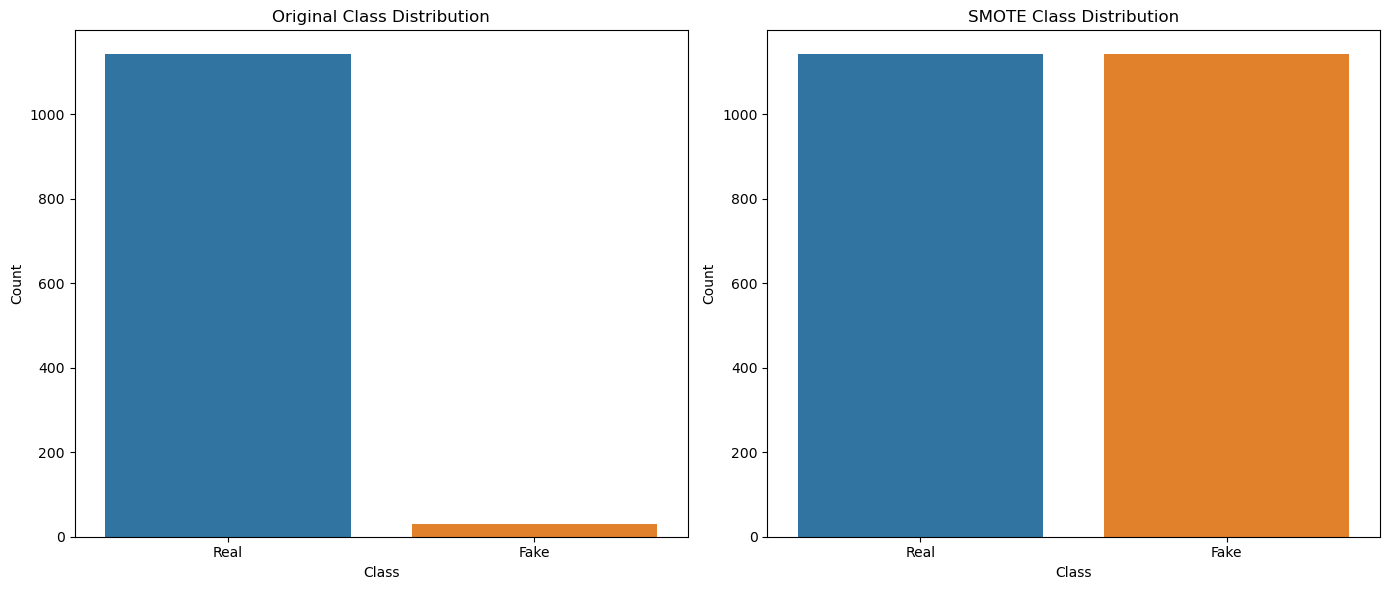

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

original_class_distribution = y_train.value_counts()

smote_class_distribution = pd.Series(y_train_smote).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=original_class_distribution.index, y=original_class_distribution.values, ax=ax[0])
ax[0].set_title('Original Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

sns.barplot(x=smote_class_distribution.index, y=smote_class_distribution.values, ax=ax[1])
ax[1].set_title('SMOTE Class Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()


In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train_smote, y_train_smote)
rf_y_pred  = rf_classifier.predict(X_test_vectorized)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[  0   6]
 [  0 287]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         6
        Real       0.98      1.00      0.99       287

    accuracy                           0.98       293
   macro avg       0.49      0.50      0.49       293
weighted avg       0.96      0.98      0.97       293



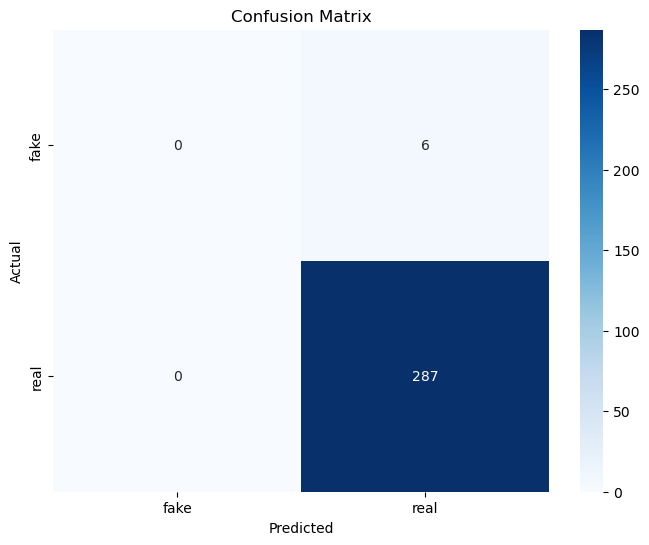

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Confusion Matrix:
[[  0   6]
 [  0 287]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         6
        Real       0.98      1.00      0.99       287

    accuracy                           0.98       293
   macro avg       0.49      0.50      0.49       293
weighted avg       0.96      0.98      0.97       293



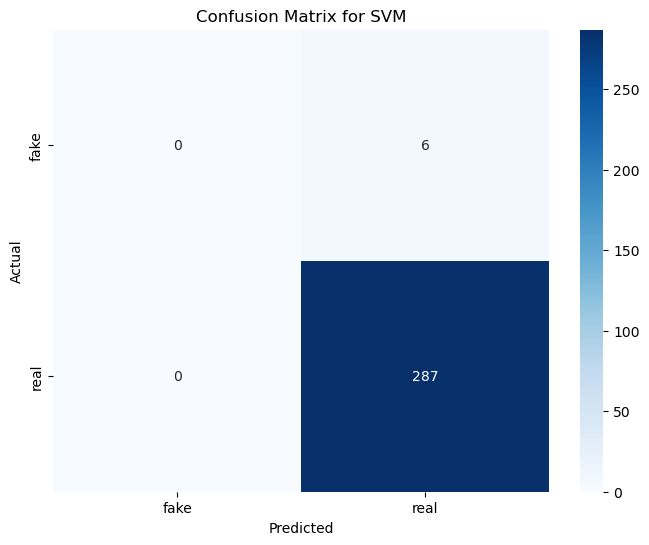

In [95]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

svm_classifier = SVC(kernel='linear', random_state=42)

svm_classifier.fit(X_train_smote, y_train_smote)

svm_y_pred  = svm_classifier.predict(X_test_vectorized)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


Confusion Matrix:
[[  0   6]
 [  0 287]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.00      0.00      0.00         6
        Real       0.98      1.00      0.99       287

    accuracy                           0.98       293
   macro avg       0.49      0.50      0.49       293
weighted avg       0.96      0.98      0.97       293



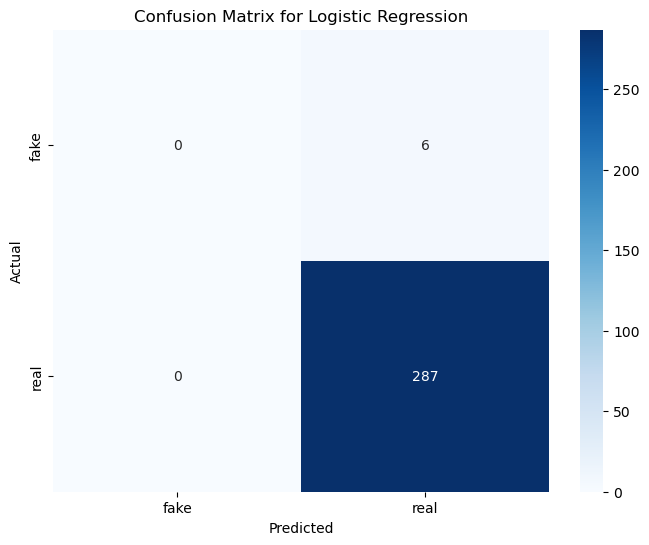

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

lr_classifier = LogisticRegression(random_state=42)

lr_classifier.fit(X_train_smote, y_train_smote)

lr_y_pred = lr_classifier.predict(X_test_vectorized)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fake', 'real'], yticklabels=['fake', 'real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


In [97]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(y_test, rf_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
lr_accuracy = accuracy_score(y_test, lr_y_pred)

Random Forest Accuracy: 0.9795
SVM Accuracy: 0.9829
Logistic Regression Accuracy: 0.9829


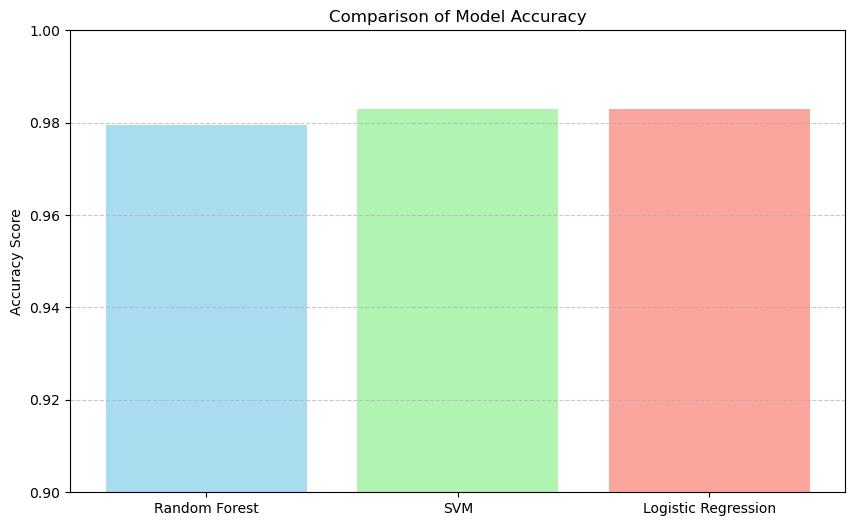

In [84]:
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

models = ['Random Forest', 'SVM', 'Logistic Regression']
accuracies = [rf_accuracy, svm_accuracy, lr_accuracy]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'], alpha=0.7)
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy')
plt.ylim(.9, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(df['cleaned_review_content'])
y = df['review_type']

lr_classifier = LogisticRegression(random_state=42)

cv_scores = cross_val_score(lr_classifier, X_vectorized, y, cv=5, scoring='accuracy')

mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score:.4f}")
print(f"Standard Deviation of CV Scores: {std_cv_score:.4f}")

Cross-Validation Scores: [0.97610922 0.97610922 0.97610922 0.97269625 0.97269625]
Mean CV Score: 0.9747
Standard Deviation of CV Scores: 0.0017


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

cv_scores_rf = cross_val_score(rf_classifier, X_vectorized, y, cv=5, scoring='accuracy')

mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)

print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Score: {mean_cv_score_rf:.4f}")
print(f"Standard Deviation of CV Scores: {std_cv_score_rf:.4f}")


Cross-Validation Scores: [0.97952218 0.97610922 0.97952218 0.97269625 0.97269625]
Mean CV Score: 0.9761
Standard Deviation of CV Scores: 0.0031


In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

svm_classifier = SVC(random_state=42)

cv_scores_svm = cross_val_score(svm_classifier, X_vectorized, y, cv=5, scoring='accuracy')

mean_cv_score_svm = np.mean(cv_scores_svm)
std_cv_score_svm = np.std(cv_scores_svm)

print(f"Cross-Validation Scores: {cv_scores_svm}")
print(f"Mean CV Score: {mean_cv_score_svm:.4f}")
print(f"Standard Deviation of CV Scores: {std_cv_score_svm:.4f}")


Cross-Validation Scores: [0.97610922 0.97610922 0.97610922 0.97269625 0.97269625]
Mean CV Score: 0.9747
Standard Deviation of CV Scores: 0.0017


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

lr_classifier = LogisticRegression(random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
svm_classifier = SVC(random_state=42)

cv_scores_lr = cross_val_score(lr_classifier, X_vectorized, y, cv=5, scoring='accuracy')
cv_scores_rf = cross_val_score(rf_classifier, X_vectorized, y, cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score(svm_classifier, X_vectorized, y, cv=5, scoring='accuracy')

mean_cv_score_lr = np.mean(cv_scores_lr)
std_cv_score_lr = np.std(cv_scores_lr)
mean_cv_score_rf = np.mean(cv_scores_rf)
std_cv_score_rf = np.std(cv_scores_rf)
mean_cv_score_svm = np.mean(cv_scores_svm)
std_cv_score_svm = np.std(cv_scores_svm)

models = ['Logistic Regression', 'Random Forest', 'SVM']
mean_scores = [mean_cv_score_lr, mean_cv_score_rf, mean_cv_score_svm]
std_scores = [std_cv_score_lr, std_cv_score_rf, std_cv_score_svm]

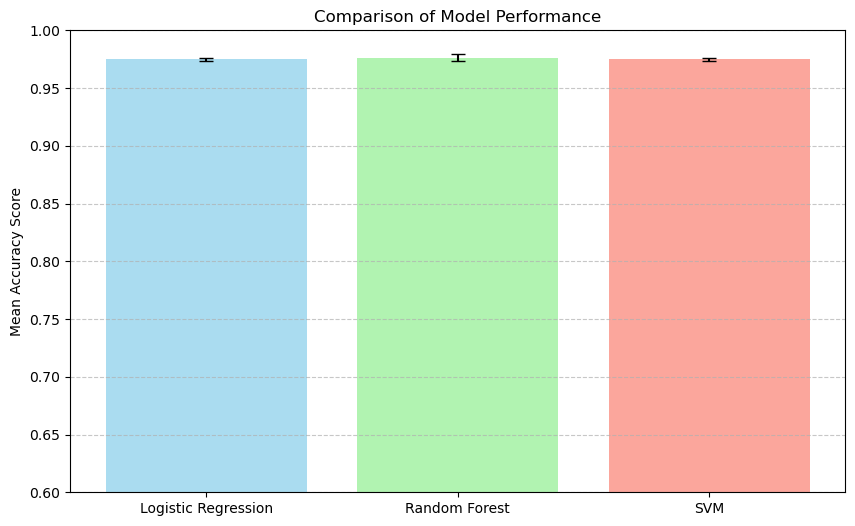

In [76]:

plt.figure(figsize=(10, 6))
plt.bar(models, mean_scores, yerr=std_scores, capsize=5, color=['skyblue', 'lightgreen', 'salmon'], alpha=0.7)
plt.ylabel('Mean Accuracy Score')
plt.title('Comparison of Model Performance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(.6, 1.0)
plt.show()


In [138]:
import pickle
import pandas as pd
import re

with open('random_forest_model.pkl', 'rb') as file:
    loaded_rf_classifier = pickle.load(file)

with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

def clean_text(text):

    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    text = re.sub(r'[^\w\s]', '', text)

    text = text.lower()
    return text

a = 'Havent received operating manūal so havent started using it. I talked to customer care no help. talked to supplier no help.'

cleaned_text = clean_text(a)

df = pd.DataFrame([cleaned_text], columns=['cleaned_review_content'])

X_vectorized = vectorizer.transform(df['cleaned_review_content'])

predictions = loaded_rf_classifier.predict(X_vectorized)

print("Prediction:", predictions[0])


Prediction: Real
